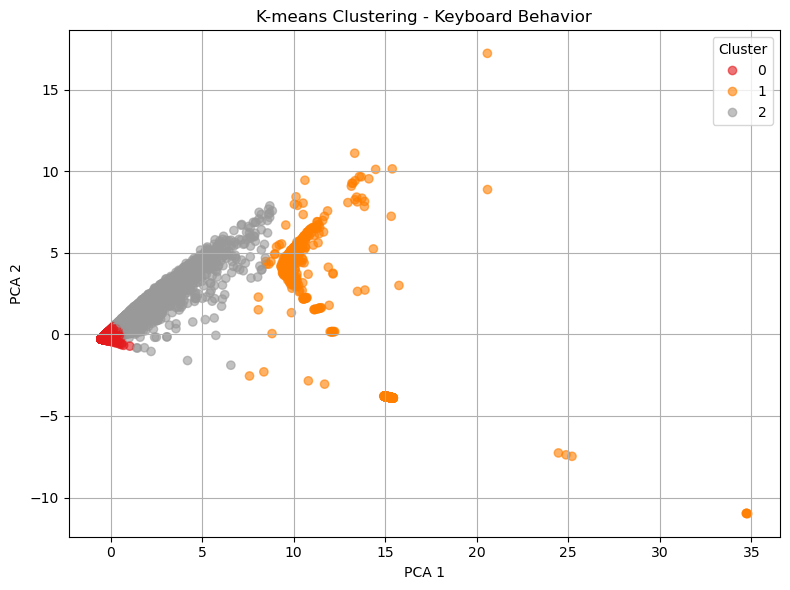

         key_down  key_ratio  max_key_count
cluster                                    
0           15.47       0.79           4.55
1          583.05     429.76         546.80
2          165.19       3.12          47.00


In [4]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# CSV dosyasını yükle
df = pd.read_csv("C:/store/git/km-stat-activity/data/real/real_activity_log.csv")

# Tarih işle
df["start_date_time"] = pd.to_datetime(df["start_date_time"], errors="coerce")
df = df[df["start_date_time"].notna()]
df["hour"] = df["start_date_time"].dt.floor("h")

# key_ratio oluştur
df["key_ratio"] = df["key_down"] / (df["key_up"] + 1)

# max_key_count çıkar
def parse_key_counts(s):
    try:
        numbers = list(map(int, s.strip("{}").split(",")))
        return max(numbers) if numbers else 0
    except:
        return 0

df["max_key_count"] = df["key_codes"].apply(parse_key_counts)

# NaN olanları temizle
df_clean = df[["key_down", "key_ratio", "max_key_count"]].dropna()

# Özellikleri ölçekle
X = StandardScaler().fit_transform(df_clean)

# K-means ile cluster
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# PCA ile 2 boyuta indir
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Görselleştir
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="Set1", alpha=0.6)
plt.title("K-means Clustering - Keyboard Behavior")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

# Her cluster için ortalama değerleri göster
df_clean["cluster"] = labels
print(df_clean.groupby("cluster").mean().round(2))


In [6]:
# key_ratio sütunu zaten hesaplandıysa:
df_suspicious = df[df["key_ratio"] > 400]

# İlk birkaç tanesini göster
print(df_suspicious[["start_date_time", "key_down", "key_up", "key_ratio"]].head())


          start_date_time  key_down  key_up  key_ratio
3193  2025-04-14 17:08:26      1110       0     1110.0
9671  2025-04-14 15:28:45       553       0      553.0
12728 2025-04-14 19:01:17       546       0      546.0
12732 2025-04-14 19:05:19       549       0      549.0
12733 2025-04-14 19:06:20       549       0      549.0


In [9]:
!jupyter nbconvert --to html keyboard_behavior_clustering.ipynb

[NbConvertApp] Converting notebook keyboard_behavior_clustering.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 349013 bytes to keyboard_behavior_clustering.html
